In [1]:
from utils import crop_roi, plot_image_grid
from dataloaders import create_dataloaders
import numpy as np
import torch

In [4]:
resnet_mean = torch.tensor([0.485, 0.456, 0.406])
resnet_std =  torch.tensor([0.229, 0.224, 0.225])
train_loader, val_loader, test_loader = create_dataloaders(normalize=False, limit=None, mean=resnet_mean, std=resnet_std, batch_size=16, dynamic_load=True)

LOADED METADATA HAS LENGTH 7470
Metadata before split has length 7470
DF_TRAIN LENGTH: 5976
DF_VAL LENGTH: 1494
LOADED METADATA HAS LENGTH 1512
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4323 images.
--Data Balance-- The second common class is 1 with 582 images with a difference of 3741 images from the most common class.
--Data Balance (Undersampling)-- Keeping 4323 from 0 class..
--Data Balance (Undersampling)-- 0 now has 4323 images
-- Data Balance (Oversampling) -- Adding 3832 from 2 class..
-- Data Balance (Oversampling) -- Adding 4061 from 4 class..
-- Data Balance (Oversampling) -- Adding 4141 from 3 class..
-- Data Balance (Oversampling) -- Adding 3741 from 1 class..
-- Data Balance (Oversampling) -- Adding 4265 from 5 class..
-- Data Balance (Oversampling) -- Adding 4245 from 6 class..


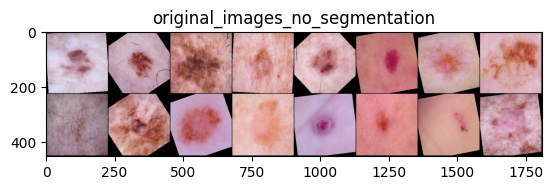

Images shape is torch.Size([16, 3, 224, 224])


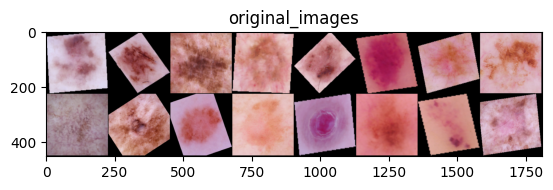

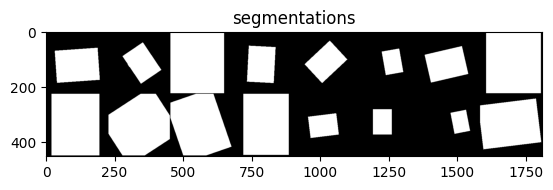

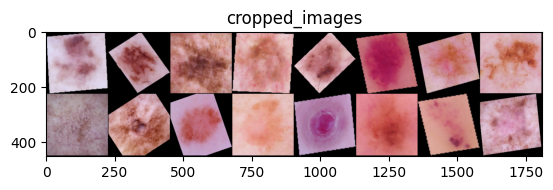

Images shape is torch.Size([16, 3, 224, 224])


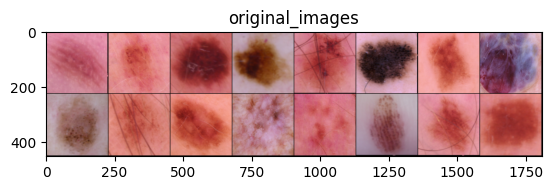

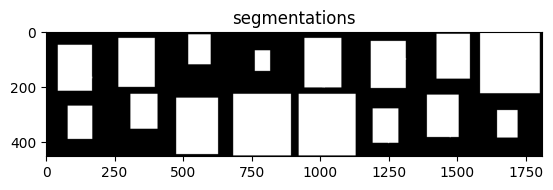

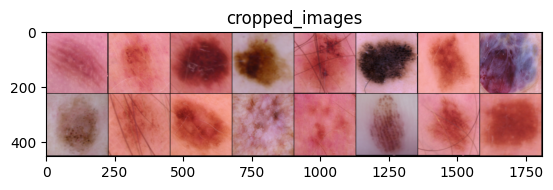

In [5]:
for tr_i, (tr_images, tr_labels, segmentations) in enumerate(train_loader):
    plot_image_grid(tr_images, "original_images_no_segmentation")
    tr_images = torch.mul(tr_images, segmentations)
    print(f"Images shape is {tr_images.shape}")
    tr_images = crop_roi(tr_images, size=(224,224))
    plot_image_grid(tr_images, "original_images")
    plot_image_grid(segmentations, "segmentations")
    plot_image_grid(tr_images, "cropped_images")
    break
for val_i, (val_images, val_labels, segmentations) in enumerate(val_loader):
    val_images = torch.mul(val_images, segmentations)
    print(f"Images shape is {val_images.shape}")
    val_images = crop_roi(val_images, size=(224,224))
    plot_image_grid(val_images, "original_images")
    plot_image_grid(segmentations, "segmentations")
    plot_image_grid(val_images, "cropped_images")
    break